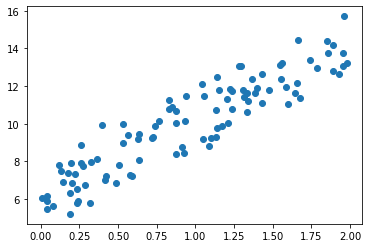

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y = 4X+6을 근사(w1=4, w0=6), 임의의 값은 노이즈를 위해 만듬
X = 2*np.random.rand(100,1)
y = 6 + 4*X+np.random.randn(100,1)

#X, y data set 산점도로 시각화
plt.scatter(X,y)

In [4]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

In [5]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T)+w0
    diff = y-y_pred
    
    #w0_update를 dot 행렬연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    #w1과 w0을 update할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update
    

In [6]:
def gradient_descent_steps(X, y, iters=1000):
    #w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    #인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 update 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    
    return w1, w0

In [7]:
w1, w0 = gradient_descent_steps(X,y,iters=1000)
print(f'w1 : {w1[0,0]}, w0 : {w0[0,0]}')
y_pred = w1[0,0]*X + w0
print(f'Gradient Descent Total Cost : {get_cost(y,y_pred)}')

w1 : 4.021813642697164, w0 : 6.162031224717461
Gradient Descent Total Cost : 0.9934784315632568


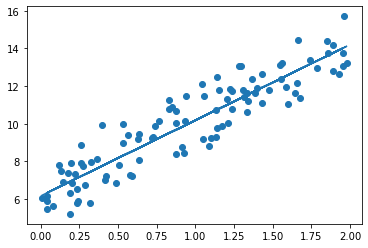

In [8]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [15]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        #전체 X, y data에서  random하게 batch_size만큼 data를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 update
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [16]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print(f'w1 : {round(w1[0,0],3)}, w0 : {round(w0[0,0],3)}')
y_pred = w1[0,0]*X + w0
print(f'Stochastic Gradient Descent Total Cost : {get_cost(y,y_pred)}')

w1 : 4.028, w0 : 6.156
Stochastic Gradient Descent Total Cost : 0.9937111256675345


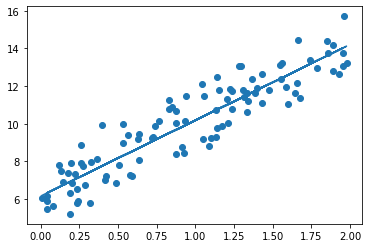

In [17]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score